In [1]:
%matplotlib inline

from collections import Counter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from empiricaldist import Pmf

from utils import decorate

In [2]:
# Class size data originally from
# https://www.purdue.edu/datadigest/2013-14/InstrStuLIfe/DistUGClasses.html
# now available from
# https://web.archive.org/web/20160415011613/https://www.purdue.edu/datadigest/2013-14/InstrStuLIfe/DistUGClasses.html

sizes = [(1, 1), 
         (2, 9),
         (10, 19),
         (20, 29),
         (30, 39),
         (40, 49),
         (50, 99),
         (100, 300)]
         
counts = [138, 635, 1788, 1979, 796, 354, 487, 333]

In [3]:
def generate_sample(sizes, counts):
    t = []
    for (low, high), count in zip(sizes, counts):
        print(count, low, high)
        sample = np.random.randint(low, high+1, count)
        t.extend(sample)
    return np.array(t)

138 1 1
635 2 9
1788 10 19
1979 20 29
796 30 39
354 40 49
487 50 99
333 100 300


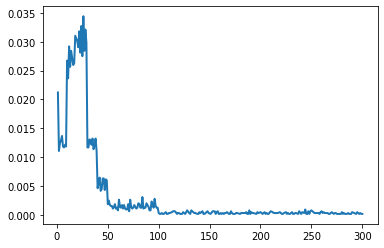

In [4]:
unbiased = generate_sample(sizes, counts)
pmf_unbiased = Pmf.from_seq(unbiased)
pmf_unbiased.plot()

In [5]:
def bias_sample(sample):
    p = np.array(sample) / np.sum(sample)
    biased = np.random.choice(sample, len(sample), replace=True, p=p)
    return biased

biased = bias_sample(unbiased)

In [6]:
from scipy.stats import gaussian_kde

def kdeplot(sample, xs, label=None, **options):
    density_unbiased = gaussian_kde(sample, **options).evaluate(xs)
    plt.plot(xs, density_unbiased, label=label)


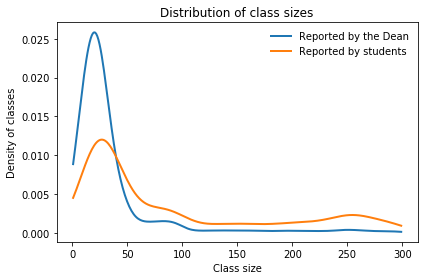

In [7]:
xs = np.arange(1, 300)
kdeplot(unbiased, xs, 'Reported by the Dean')
kdeplot(biased, xs, 'Reported by students')

decorate(xlabel='Class size',
         ylabel='Density of classes',
         title='Distribution of class sizes')

plt.savefig('inspection/class_size.png', dpi=150)

In [8]:
np.mean(unbiased)

34.415514592933945

In [9]:
np.mean(biased)

89.81198156682028

In [10]:
unbiased = [
    428.0, 705.0, 407.0, 465.0, 433.0, 425.0, 204.0, 506.0, 143.0, 351.0, 
    450.0, 598.0, 464.0, 749.0, 341.0, 586.0, 754.0, 256.0, 378.0, 435.0, 
    176.0, 405.0, 360.0, 519.0, 648.0, 374.0, 483.0, 537.0, 578.0, 534.0, 
    577.0, 619.0, 538.0, 331.0, 186.0, 629.0, 193.0, 360.0, 660.0, 484.0, 
    512.0, 315.0, 457.0, 404.0, 740.0, 388.0, 357.0, 485.0, 567.0, 160.0, 
    428.0, 387.0, 901.0, 187.0, 622.0, 616.0, 585.0, 474.0, 442.0, 499.0, 
    437.0, 620.0, 351.0, 286.0, 373.0, 232.0, 393.0, 745.0, 636.0, 758.0,
]

In [11]:
unbiased = np.array(unbiased) / 60

In [12]:
biased = bias_sample(unbiased)

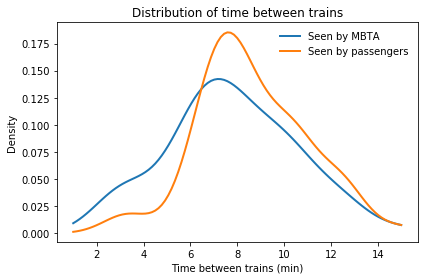

In [13]:
xs = np.linspace(1, 15, 101)
kdeplot(unbiased, xs, 'Seen by MBTA')
kdeplot(biased, xs, 'Seen by passengers')

decorate(xlabel='Time between trains (min)',
         ylabel='Density',
         title='Distribution of time between trains')

plt.savefig('inspection/red_line.png', dpi=150)

In [14]:
np.mean(biased), np.mean(unbiased)

(8.635, 7.7680952380952375)

In [15]:
(np.mean(biased) - np.mean(unbiased)) /  np.mean(unbiased)

0.1115981119352664

In [16]:
import networkx as nx

def read_graph(filename):
    """Read a graph from a file.
    
    filename: string
    
    return: Graph
    """
    G = nx.Graph()
    array = np.loadtxt(filename, dtype=int)
    G.add_edges_from(array)
    return G

In [17]:
# https://snap.stanford.edu/data/facebook_combined.txt.gz

fb = read_graph('facebook_combined.txt.gz')
n = len(fb)
m = len(fb.edges())
n, m

(4039, 88234)

In [18]:
unbiased = [fb.degree(node) for node in fb]
len(unbiased)

4039

In [19]:
np.max(unbiased)

1045

In [20]:
biased = bias_sample(unbiased)

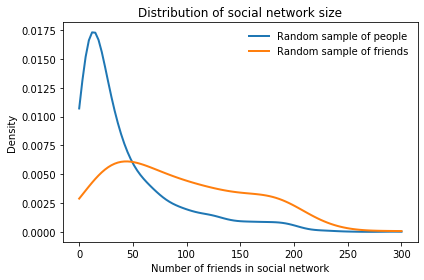

In [21]:
xs = np.linspace(0, 300, 101)
kdeplot(unbiased, xs, 'Random sample of people')
kdeplot(biased, xs, 'Random sample of friends')

decorate(xlabel='Number of friends in social network',
         ylabel='Density',
         title='Distribution of social network size')

plt.savefig('inspection/social.png', dpi=150)

In [22]:
np.mean(biased), np.mean(unbiased)

(108.18172815053231, 43.69101262688784)

In [23]:
np.mean(biased > unbiased)

0.761822233226046

In [24]:
import relay
results = relay.ReadResults()
unbiased = relay.GetSpeeds(results)

In [25]:
p = np.abs(np.array(unbiased) - 7)
p /= np.sum(p)
biased = np.random.choice(unbiased, len(unbiased), replace=True, p=p)

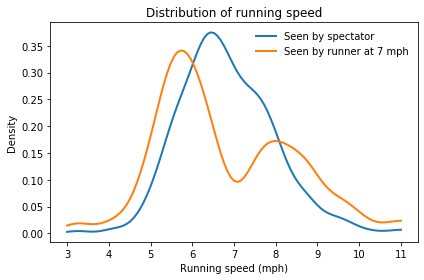

In [26]:
xs = np.linspace(3, 11, 101)
kdeplot(unbiased, xs, 'Seen by spectator')
kdeplot(biased, xs, 'Seen by runner at 7 mph', bw_method=0.2)

decorate(xlabel='Running speed (mph)',
         ylabel='Density',
         title='Distribution of running speed')

plt.savefig('inspection/relay.png', dpi=150)

https://www.bop.gov/about/statistics/statistics_inmate_sentences.jsp

In [28]:
tables = pd.read_html('BOP Statistics_ Sentences Imposed.html')

In [33]:
df = tables[0]
df

,Sentence,# of Inmates,% of Inmates
0,0 to 1 year*,5155,2.3 %
1,> 1 year to < 3 years**,18619,11.3%
2,3 years to < 5 years,17897,10.9%
3,5 years to < 10 years,41887,25.4%
4,10 years to < 15 years,34995,21.3%
5,15 years to < 20 years,18674,11.3%
6,20 years or more but < Life,22738,13.8%
7,Life,4600,2.8%


In [51]:
sentences = [(0.02, 1),
             (1, 3),
             (3, 5),
             (5, 10),
             (10, 15),
             (15, 20),
             (20, 40),
             (40, 60)]

In [52]:
counts = df['# of Inmates']

In [88]:
def generate_sample(sizes, counts):
    t = []
    for (low, high), count in zip(sizes, counts):
        print(count, low, high)
        sample = np.random.uniform(low, high, count)
        t.extend(sample)
    return np.array(t)

In [89]:
biased = generate_sample(sentences, counts)

5155 0.02 1
18619 1 3
17897 3 5
41887 5 10
34995 10 15
18674 15 20
22738 20 40
4600 40 60


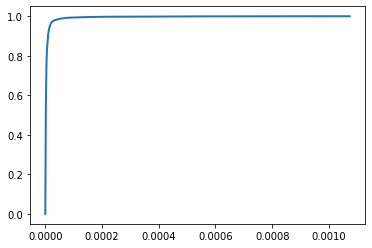

In [90]:
p = 1 / (0.85 * np.array(biased))
p /= np.sum(p)
Cdf.from_seq(p).plot()

In [91]:
unbiased = np.random.choice(biased, len(biased), replace=True, p=p)

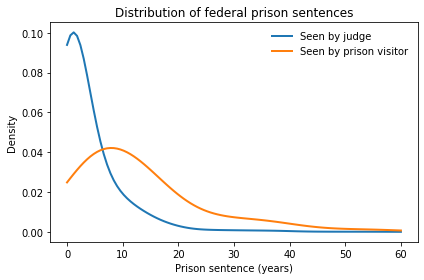

In [92]:
xs = np.linspace(0, 60, 101)
kdeplot(unbiased, xs, 'Seen by judge', bw_method=0.5)
kdeplot(biased, xs, 'Seen by prison visitor', bw_method=0.5)

decorate(xlabel='Prison sentence (years)',
         ylabel='Density',
         title='Distribution of federal prison sentences')

plt.savefig('inspection/orange.png', dpi=150)

In [93]:
p = 1 / (0.85 * np.array(biased) + 13/12)
p /= np.sum(p)

In [94]:
kerman = np.random.choice(biased, len(biased), replace=True, p=p)

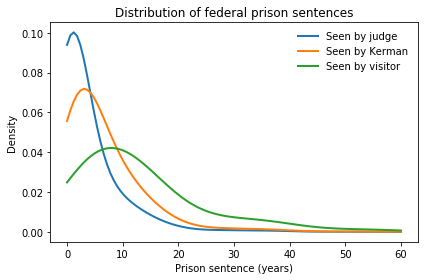

In [95]:
xs = np.linspace(0, 60, 101)
kdeplot(unbiased, xs, 'Seen by judge', bw_method=0.5)
kdeplot(kerman, xs, 'Seen by Kerman', bw_method=0.5)
kdeplot(biased, xs, 'Seen by visitor', bw_method=0.5)

decorate(xlabel='Prison sentence (years)',
         ylabel='Density',
         title='Distribution of federal prison sentences')

plt.savefig('inspection/orange.png', dpi=150)

In [96]:
np.mean(unbiased<1)

0.4498830249445508

In [97]:
np.mean(biased<1)

0.0313250083553611

In [98]:
np.mean(unbiased)

3.5689470000162147

In [99]:
np.mean(biased)

12.769149903340038

In [100]:
np.mean(kerman)

6.334843435587461